<a href="https://colab.research.google.com/github/vipin-jangra/face-age-estimation-CNN/blob/main/combinedDataLarge_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from zipfile import ZipFile
import shutil
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Unzipping the dataset file combined_faces.zip

faces_zip_path = "/content/drive/MyDrive/Dataset/Dataset2/Combined_Dataset_noisy.zip";

with ZipFile(faces_zip_path, 'r') as myzip:
    myzip.extractall()
    print('Done unzipping faces.zip')

Done unzipping faces.zip


In [5]:
dataset_dir = '/content/Dataset'
# Get the list of all image file paths

image_paths = [os.path.join(dataset_dir, fname) for fname in os.listdir(dataset_dir) if fname.endswith('.jpg')]
print(f"Images shape: {len(image_paths)}")

Images shape: 26268


In [6]:
dataset_path = '/content/Dataset'  # Change this to your dataset folder
# Extract age labels from filenames
ages = [int(fname.split('_')[1]) for fname in os.listdir(dataset_path) if fname.endswith('.jpg')]
print(f"Ages shape: {len(ages)}")

Ages shape: 26268


In [7]:
# Check the distribution of ages
age_counts = pd.Series(ages).value_counts()
print("Age distribution:\n", age_counts)

Age distribution:
 1      1113
26      554
35      534
32      519
30      494
       ... 
99        3
98        2
110       2
101       2
97        1
Name: count, Length: 102, dtype: int64


In [8]:
# Find ages with fewer than 50 images
ages_with_few_images = age_counts[age_counts < 130].index.tolist()

# Print ages with fewer than 50 images
if ages_with_few_images:
    print("Ages with fewer than 50 images:", ages_with_few_images)
else:
    print("All ages have 50 or more images.")

Ages with fewer than 50 images: [77, 6, 12, 82, 13, 79, 81, 11, 90, 83, 86, 84, 88, 89, 87, 92, 96, 91, 93, 95, 94, 100, 99, 98, 110, 101, 97]


In [ ]:
# import os
# import random
# import shutil

# def select_images_for_ages(image_paths, ages, output_directory, max_images_per_age=130, age_limit=80):
#     # Create the output directory if it doesn't exist
#     data_dir = os.path.join(output_directory, 'Dataset_Selected')
#     os.makedirs(data_dir, exist_ok=True)

#     # Create a dictionary to hold images for each age
#     age_image_map = {}

#     # Populate the dictionary with images categorized by age
#     for img_path, age in zip(image_paths, ages):
#         if age <= age_limit:  # Only consider ages up to the specified limit
#             if age not in age_image_map:
#                 age_image_map[age] = []
#             age_image_map[age].append(img_path)

#     # Select images
#     for age, img_list in age_image_map.items():
#         selected_images = random.sample(img_list, min(max_images_per_age, len(img_list)))  # Select up to 100 images
#         for img_path in selected_images:
#             shutil.copy(img_path, os.path.join(data_dir, f"{os.path.basename(img_path)}"))  # Save images with age prefix

#     print(f"Selected images saved to '{data_dir}' for ages up to {age_limit}.")


In [9]:
import os
import random
import shutil

def select_images_for_ages(image_paths, ages, output_directory, age_limit=80):
    # Create the output directory if it doesn't exist
    data_dir = os.path.join(output_directory, 'Dataset_Selected')
    os.makedirs(data_dir, exist_ok=True)

    # Create a dictionary to hold images for each age
    age_image_map = {}

    # Populate the dictionary with images categorized by age
    for img_path, age in zip(image_paths, ages):
        if age <= age_limit:  # Only consider ages up to the specified limit
            if age not in age_image_map:
                age_image_map[age] = []
            age_image_map[age].append(img_path)

    # Select and copy images
    for age, img_list in age_image_map.items():
        for img_path in img_list:  # Copy all images for the selected age
            shutil.copy(img_path, os.path.join(data_dir, f"{os.path.basename(img_path)}"))  # Save images

    print(f"Selected images saved to '{data_dir}' for ages up to {age_limit}.")

# Example usage
# select_images_for_ages(image_paths, ages, output_directory)


In [10]:
# Corresponding list of ages for the images
output_directory = '/content/'  # Change to your desired output directory

select_images_for_ages(image_paths, ages, output_directory)


Selected images saved to '/content/Dataset_Selected' for ages up to 80.


In [11]:
dataset_path = '/content/Dataset_Selected'  # Change this to your dataset folder
# Extract age labels from filenames
ages = [int(fname.split('_')[1]) for fname in os.listdir(dataset_path) if fname.endswith('.jpg')]
print(f"Ages shape: {len(ages)}")

Ages shape: 25428


In [ ]:
# # Check the distribution of ages
# age_counts = pd.Series(ages).value_counts()
# print("Age distribution:\n", age_counts)

Age distribution:
 53    130
4     130
1     130
20    130
37    130
     ... 
6     122
12    120
13     97
79     92
11     83
Name: count, Length: 80, dtype: int64


In [12]:
# Check the distribution of ages
age_counts = pd.Series(ages).value_counts()
print("Age distribution:\n", age_counts)

Age distribution:
 1     1113
26     554
35     534
32     519
30     494
      ... 
6      122
12     120
13      97
79      92
11      83
Name: count, Length: 80, dtype: int64


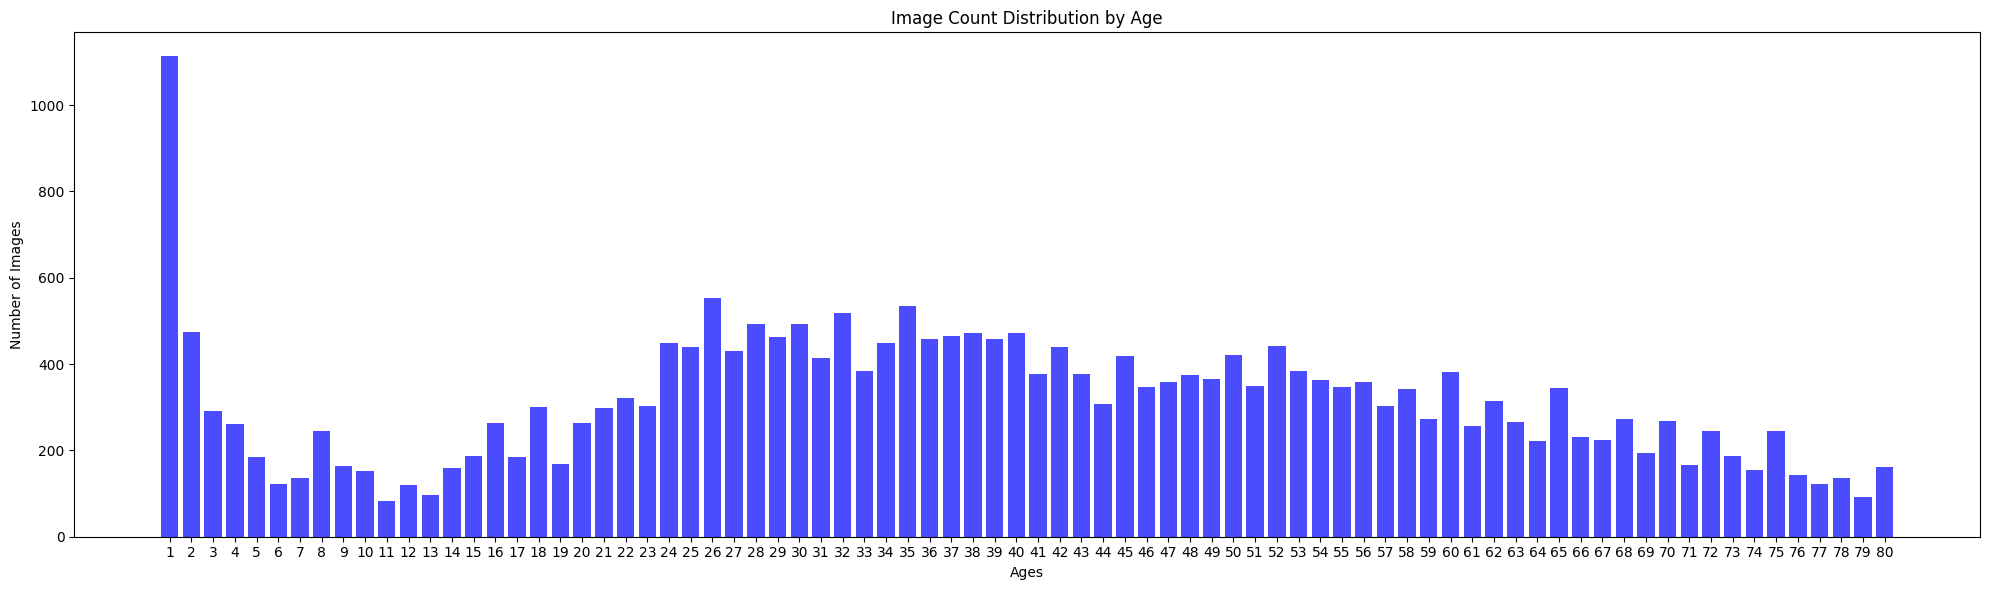

In [13]:
import matplotlib.pyplot as plt

# Function to plot age distribution
def plot_age_distribution(age_counts):
    # Create a bar plot
    plt.figure(figsize=(20, 6))

    # Define the x-axis positions
    ages = list(age_counts.index)  # Get the age labels from the index
    counts = age_counts.values  # Get the corresponding counts

    # Create the bar plot
    plt.bar(ages, counts, color='b', alpha=0.7)

    # Adding labels and title
    plt.xlabel('Ages')
    plt.ylabel('Number of Images')
    plt.title('Image Count Distribution by Age')
    plt.xticks(ages)  # Set x-ticks to show all ages

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming age_counts is a Pandas Series containing the count of images for each age
age_counts = pd.Series(ages).value_counts().sort_index()  # Replace with your actual age counts
plot_age_distribution(age_counts)


In [14]:
dataset_dir = '/content/Dataset_Selected'
# Get the list of all image file paths

image_paths = [os.path.join(dataset_dir, fname) for fname in os.listdir(dataset_dir) if fname.endswith('.jpg')]
print(f"Images shape: {len(image_paths)}")

Images shape: 25428


In [15]:
dataset_path = '/content/Dataset_Selected'  # Change this to your dataset folder
# Extract age labels from filenames
ages = [int(fname.split('_')[1]) for fname in os.listdir(dataset_path) if fname.endswith('.jpg')]
print(f"Ages shape: {len(ages)}")

Ages shape: 25428


In [16]:
# Create a DataFrame from your image paths and ages
data = pd.DataFrame({'image_path': image_paths, 'age': ages})
data.head()

,image_path,age
0,/content/Dataset_Selected/age_53_53_0_0_201701...,53
1,/content/Dataset_Selected/age_19_76_PaulAnka_1...,19
2,/content/Dataset_Selected/age_1_1_0_0_20161219...,1
3,/content/Dataset_Selected/age_25_10639_LuiseRa...,25
4,/content/Dataset_Selected/age_1_1_0_4_20170110...,1


In [17]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(
    data,
    test_size=0.2,  # 20% for testing
    stratify=data['age'],  # Stratified split based on age
    random_state=42  # For reproducibility
)

In [18]:
# Print the age distribution in train and test sets
print("Training set age distribution:")
print(train_data['age'].value_counts())
print("\nTesting set age distribution:")
print(test_data['age'].value_counts())

Training set age distribution:
age
1     890
26    443
35    427
32    415
30    395
     ... 
6      98
12     96
13     78
79     74
11     67
Name: count, Length: 80, dtype: int64

Testing set age distribution:
age
1     223
26    111
35    107
32    104
30     99
     ... 
6      24
12     24
13     19
79     18
11     16
Name: count, Length: 80, dtype: int64


In [19]:
def process_and_split_dataset(dataset_path, output_path, resize_dim=(224, 224), test_size=0.2):
  # Create output directories for training and testing
    train_dir = os.path.join(output_path, 'train')
    test_dir = os.path.join(output_path, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Split the dataset into training and testing sets
    train_images, test_images, train_labels, test_labels = train_test_split(
        image_paths, ages,stratify=data['age'], test_size=test_size, random_state=42
    )


  # Save training images and create train CSV
    train_data = []
    for img_path, label in zip(train_images, train_labels):
        try:
            img = Image.open(img_path)  # Open the image
            img.save(os.path.join(train_dir, os.path.basename(img_path)))  # Save image to train folder
            train_data.append({'filepath': os.path.join(train_dir, os.path.basename(img_path)), 'age': label})  # Full path
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    train_df = pd.DataFrame(train_data)
    train_df.to_csv(os.path.join(output_path, 'train_labels.csv'), index=False)

    # Save testing images and create test CSV
    test_data = []
    for img_path, label in zip(test_images, test_labels):
        try:
            img = Image.open(img_path)  # Open the image
            img.save(os.path.join(test_dir, os.path.basename(img_path)))  # Save image to test folder
            test_data.append({'filepath': os.path.join(test_dir, os.path.basename(img_path)), 'age': label})  # Full path
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    test_df = pd.DataFrame(test_data)
    test_df.to_csv(os.path.join(output_path, 'test_labels.csv'), index=False)


    print(f"Dataset processed and split into '{train_dir}' and '{test_dir}' with labels saved as CSV.")

In [20]:
# Example usage
filepath = '/content/combinedData'
output_path = '/content/combinedDataLarge/combinedDataLarge'   # Change this to your output folder
process_and_split_dataset(dataset_path, output_path)

Dataset processed and split into '/content/combinedDataLarge/combinedDataLarge/train' and '/content/combinedDataLarge/combinedDataLarge/test' with labels saved as CSV.


In [21]:
import shutil

# Path to the output folder where 'train' and 'test' directories are created
output_path = '/content/combinedDataLarge'  # Change this to your output folder path
shutil.make_archive(output_path, 'zip', output_path)

from google.colab import files
files.download(output_path + '.zip')  # Download the zip file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>